In [1]:
from qiskit import *
import matplotlib.pyplot as plt
from qiskit.providers.ibmq import least_busy
from qiskit.tools.visualization import plot_histogram

C:\Users\nico_\Anaconda3\lib\site-packages\qiskit\__init__.py:66: DeprecationWarning: Using Qiskit with Python 3.6 is deprecated as of qiskit-terra 0.17.0. Support for running Qiskit with Python 3.6 will be removed in qiskit-terra 0.20.0.
  DeprecationWarning,


In [2]:
#qbits
n = 8
#bv string
s = '00110110'

In [3]:
qc = QuantumCircuit(n+1,n)
#aux qbit in |-> state
qc.h(n)
qc.z(n)

#sets the balanced superposition
for q in range(n):
    qc.h(q)
    
qc.barrier()

In [4]:
#oracle, the bernstein-vazirani oracle (same as deutsch-jotsza oracle) is analogous as a cnot

s = s[::-1]#reverse the string, one reads bits from right to left
for q in range(n):
    if s[q] == '1':
        qc.cx(q,n)

qc.barrier()

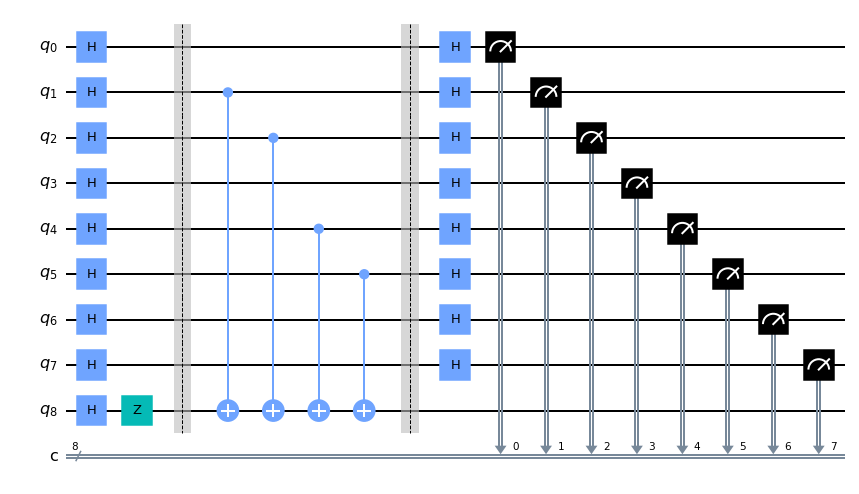

In [5]:
for q in range(n):
    qc.h(q)
    
for i in range(n):
    qc.measure(i,i)
qc.draw(output='mpl')

C:\Users\nico_\Anaconda3\lib\site-packages\qiskit\utils\deprecation.py:62: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  return func(*args, **kwargs)


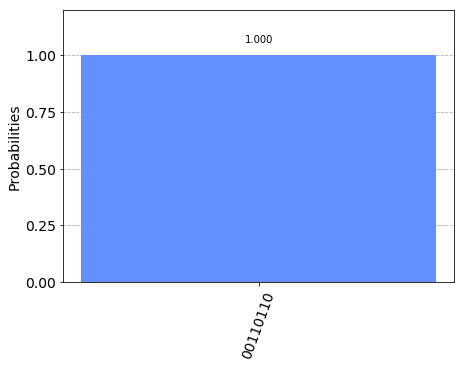

In [6]:
#simulator
'''
aer_sim = Aer.get_backend('aer_simulator')
shots = 1024
qobj = assemble(qc)
results = aer_sim.run(qobj).result()
answer = results.get_counts()

plot_histogram(answer)
''''''